Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

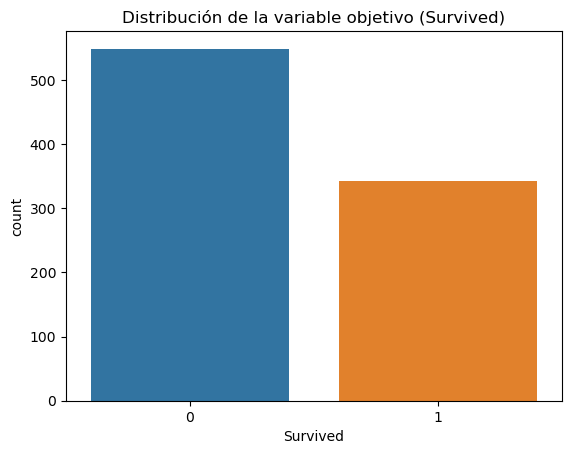

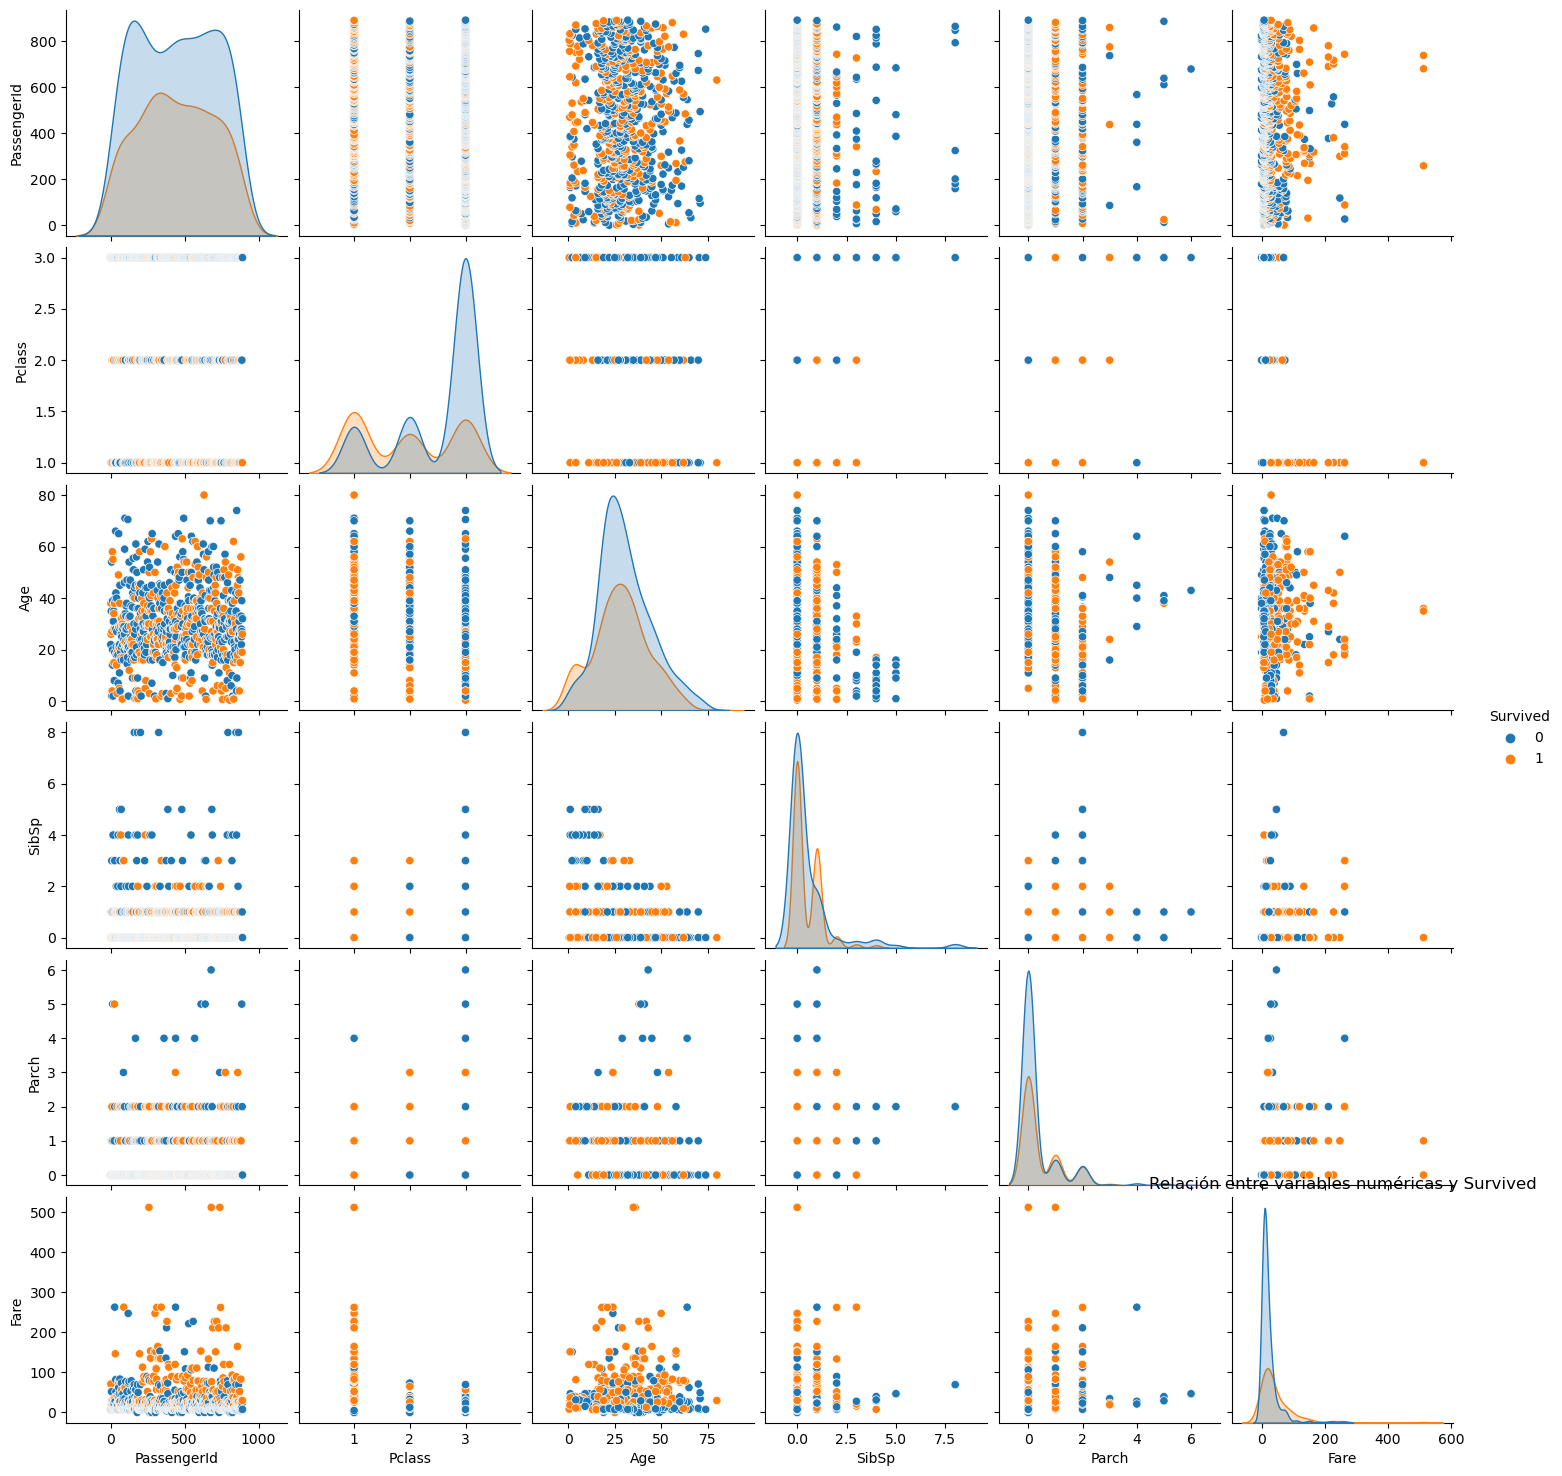


Resultados del modelo:
Accuracy: 0.7318435754189944
Precision: 0.7708333333333334
Recall: 0.5
F1-score: 0.6065573770491803


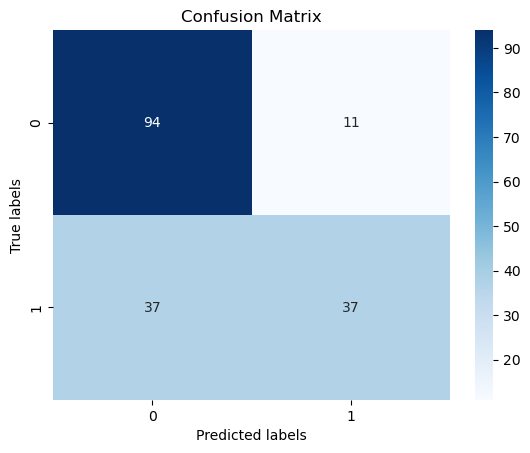

<Figure size 640x480 with 0 Axes>

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Paso 1: Análisis exploratorio de datos
data = pd.read_csv('D:\\ejercios\\ejercio1\\unidad-5\\Titanic-Dataset.csv')

# Mostrar las primeras filas del dataframe
print("Primeras filas del dataset:")
print(data.head())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(data.describe())

# Visualización de la distribución de la variable objetivo
sns.countplot(x='Survived', data=data)
plt.title('Distribución de la variable objetivo (Survived)')
plt.show()

# Visualización de la relación entre variables numéricas y la variable objetivo
sns.pairplot(data=data, hue='Survived')
plt.title('Relación entre variables numéricas y Survived')
plt.show()

# Paso 2: Preprocesamiento de datos
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data.select_dtypes(include=[np.number]))
data_imputed = pd.DataFrame(data_imputed, columns=data.select_dtypes(include=[np.number]).columns)

# Paso 3: Selección de características
X = data_imputed.drop('Survived', axis=1)  # Features
y = data_imputed['Survived']  # Target variable

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Paso 4: Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Paso 5: Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Paso 6: Evaluar el desempeño del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nResultados del modelo:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Paso 7: Realizar las diferentes gráficas
# Por ejemplo, una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Después de crear las visualizaciones y antes de mostrarlas
plt.tight_layout()
plt.show()